## Analyzing heating events at Artisan's Asylum

At Artisan's asylum, we'd been monitoring CO2 levels for a few weeks; data is here: [http://co2dataviz.pvos.org/data/brj93kvnkf6b/](http://co2dataviz.pvos.org/data/brj93kvnkf6b/)

We'd noticed particularly high CO2 levels.  A series of heating system failures led us to realize that the main source of the CO2 we were seeing was the heating system.  

![](img/heating_events_mar_5_annotated.png)

Based on the ventilation analysis suggested in [this twitter thread](https://twitter.com/Poppendieck/status/1366055149983076354), we attempt below to model several of these heating-system-failure events (labeled "A", "B", "C" above) with exponentials, in order to assess the time constant for the decay of CO2 over time. 

![](img/twitter_fit.png)

Some notes on the suggestions in the thread above:
- Avoid using the first 5 minutes after the initial decay onset
- Avoid using values below 600 ppm
- Assessing the time constant in units of hours results in a standardized measure of ventilation, the "air change per hour" (ACH).

![](img/ach_guidance.png)


## Data Analysis

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import numpy as np

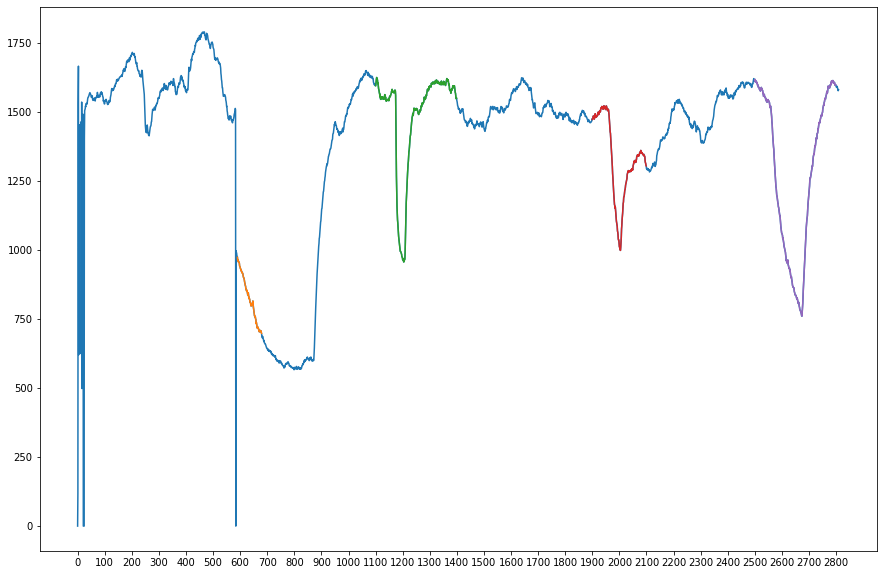

In [244]:
feed_a_pubkey = "jdwktcu9xt5c" # wood shop
#feed_b_pubkey = "b2srm27dragm" # front desk

# code below will plot the 'distance_meters' parameter from both of those feeds on the same chart
base_url = "http://co2data.pvos.org/data/"
feed_a_data = pd.read_csv(base_url+feed_a_pubkey+"/csv/")
#feed_b_data = pd.read_csv(base_url+feed_b_pubkey+"/csv/")

y_1=feed_a_data['co2']

plt.figure(figsize=(15, 10))
plt.plot(y_1)
plt.xticks(np.arange(0,len(y1),100))

event_a = y1[590:680]
plt.plot(event_a)

event_b = y1[1100:1400]
plt.plot(event_b)

event_c = y1[1900:2100]
plt.plot(event_c)

event_d = y1[2500:2800]
plt.plot(event_d)
plt.show()


In [245]:
# get a time array in units of hours
t_hours=(pd.to_datetime(feed_a_data['created']).astype(int)/10**9)/3600
t_hours=(t_hours-t_hours[0]).to_numpy()

In [246]:
# get an array of the co2 values
co2=feed_a_data['co2'].to_numpy()

# Event A

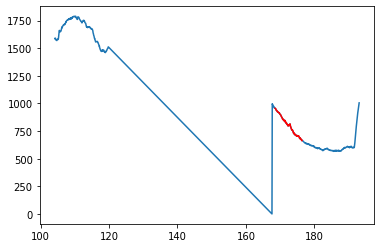

In [247]:
# indices of our event
index_min = 595
index_max = 690

# create subset of data for the event
y=co2[index_min:index_max]
x=t_hours[index_min:index_max]

# plot the event over the entire dataset to make sure our indices are right
delta = 200 #range to expand plot for double-check
plt.plot(t_hours[index_min-delta:index_max+delta],co2[index_min-delta:index_max+delta])
plt.plot(x,y,'r')
plt.show()

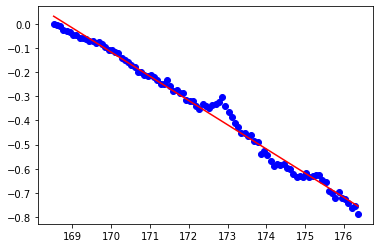

In [248]:
co2_outside=420
amplitude=y[0]-co2_outside
y_prime = np.log((y-co2_outside)/amplitude)
p = np.polyfit(x, y_prime, 1)
f = np.poly1d(p)
fig=plt.figure()
ax=fig.add_subplot(111)
plt.plot(x,y_prime,'bo',label="Data")
plt.plot(x,f(x), 'r-',label="Polyfit")
plt.show()

In [249]:
# ach is - 1 / tau
tau=-1/p[0]
print("ACH:"+str(round(tau,1)))

ACH:10.0


# Event B

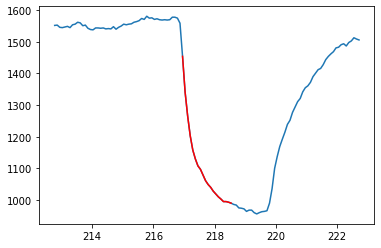

In [250]:
# indices of our event
index_min = 1175
index_max = 1195

# create subset of data for the event
y=co2[index_min:index_max]
x=t_hours[index_min:index_max]

# plot the event over the entire dataset to make sure our indices are right
delta = 50 #range to expand plot for double-check
plt.plot(t_hours[index_min-delta:index_max+delta],co2[index_min-delta:index_max+delta])
plt.plot(x,y,'r')
plt.show()

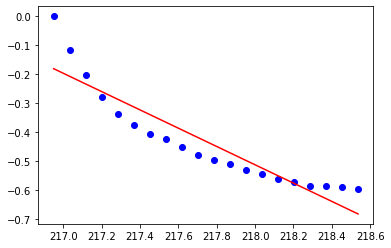

In [251]:
co2_outside=420
amplitude=y[0]-co2_outside
y_prime = np.log((y-co2_outside)/amplitude)
p = np.polyfit(x, y_prime, 1)
f = np.poly1d(p)
fig=plt.figure()
ax=fig.add_subplot(111)
plt.plot(x,y_prime,'bo',label="Data")
plt.plot(x,f(x), 'r-',label="Polyfit")
plt.show()

In [252]:
# ach is - 1 / tau
tau=-1/p[0]
print("ACH:"+str(round(tau,1)))

ACH:3.2


# Event C

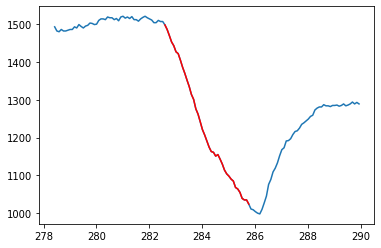

In [253]:
# indices of our event
index_min = 1961
index_max = 2000

# create subset of data for the event
y=co2[index_min:index_max]
x=t_hours[index_min:index_max]

# plot the event over the entire dataset to make sure our indices are right
delta = 50 #range to expand plot for double-check
plt.plot(t_hours[index_min-delta:index_max+delta],co2[index_min-delta:index_max+delta])
plt.plot(x,y,'r')
plt.show()

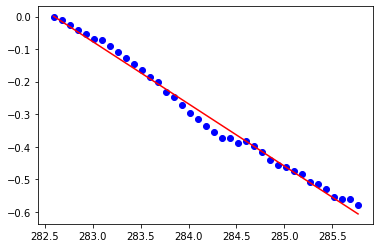

In [254]:
co2_outside=420
amplitude=y[0]-co2_outside
y_prime = np.log((y-co2_outside)/amplitude)
p = np.polyfit(x, y_prime, 1)
f = np.poly1d(p)
fig=plt.figure()
ax=fig.add_subplot(111)
plt.plot(x,y_prime,'bo',label="Data")
plt.plot(x,f(x), 'r-',label="Polyfit")
plt.show()

In [255]:
# ach is - 1 / tau
tau=-1/p[0]
print("ACH:"+str(round(tau,1)))

ACH:5.2


# Event D

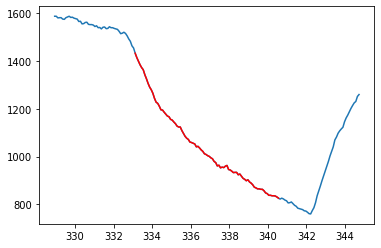

In [287]:
# indices of our event
index_min = 2565
index_max = 2655

# create subset of data for the event
y=co2[index_min:index_max]
x=t_hours[index_min:index_max]

# plot the event over the entire dataset to make sure our indices are right
delta = 50 #range to expand plot for double-check
plt.plot(t_hours[index_min-delta:index_max+delta],co2[index_min-delta:index_max+delta])
plt.plot(x,y,'r')
plt.show()

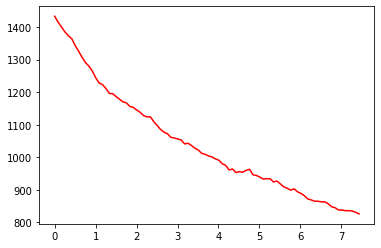

In [289]:
x=x-x[0]
plt.plot(x,y,'r')

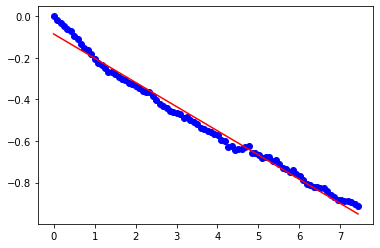

In [290]:
co2_outside=420
amplitude=y[0]-co2_outside
y_prime = np.log((y-co2_outside)/amplitude)
p = np.polyfit(x, y_prime, 1)
f = np.poly1d(p)
fig=plt.figure()
ax=fig.add_subplot(111)
plt.plot(x,y_prime,'bo',label="Data")
plt.plot(x,f(x), 'r-',label="Polyfit")
plt.show()

In [291]:
# ach is - 1 / tau
tau=-1/p[0]
print("ACH:"+str(round(tau,1)))

ACH:8.6


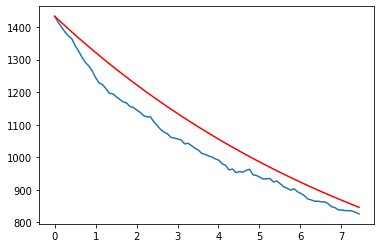

In [298]:
exp_arg=p[0]*x
y_fit = amplitude*np.exp(exp_arg)+co2_outside
plt.plot(x,y)
plt.plot(x,y_fit,'r')